In [ ]:
import pandas as pd
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/used_cars.csv")
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# -----------------------------
# Clean 'milage' column
# -----------------------------
df['milage'] = df['milage'].astype(str)
df['milage'] = df['milage'].str.replace(' mi.', '', regex=False)
df['milage'] = df['milage'].str.replace(',', '', regex=False)
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

# -----------------------------
# Clean 'price' column
# -----------------------------
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# -----------------------------
# Handle missing values
# -----------------------------
df = df.dropna(subset=['price', 'milage'])
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

# -----------------------------
# Remove outliers
# -----------------------------
df = df[(df['price'] > 500) & (df['price'] < 5000000)]
df = df[(df['milage'] >= 0) & (df['milage'] < 500000)]

# -----------------------------
# Feature Engineering
# -----------------------------
current_year = datetime.now().year
df['Car_Age'] = current_year - df['model_year']
df['Mileage_per_Year'] = df['milage'] / df['Car_Age']

# -----------------------------
# Reset index
# -----------------------------
df = df.reset_index(drop=True)

# -----------------------------
# Save cleaned dataset
# -----------------------------
df.to_csv("/content/used_cars_cleaned.csv", index=False)

print("Data cleaning and feature engineering completed successfully!")


Data cleaning and feature engineering completed successfully!


/tmp/ipython-input-1731948618.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("/content/used_cars_cleaned.csv")


In [ ]:
# Column types
print(df.dtypes)

# Summary statistics for numeric columns
print(df.describe())

# Check top 5 rows
print(df.head())

# Count of unique brands
print(df['brand'].value_counts())


brand                object
model                object
model_year            int64
milage                int64
fuel_type            object
engine               object
transmission         object
ext_col              object
int_col              object
accident             object
clean_title          object
price                 int64
Car_Age               int64
Mileage_per_Year    float64
dtype: object
        model_year         milage         price      Car_Age  Mileage_per_Year
count  4009.000000    4009.000000  4.009000e+03  4009.000000       4009.000000
mean   2015.515590   64717.551010  4.455319e+04     9.484410       6837.321353
std       6.104816   52296.599459  7.871064e+04     6.104816       4269.998666
min    1974.000000     100.000000  2.000000e+03     1.000000         33.333333
25%    2012.000000   23044.000000  1.720000e+04     5.000000       3750.000000
50%    2017.000000   52775.000000  3.100000e+04     8.000000       6333.333333
75%    2020.000000   94100.000000  4.9990

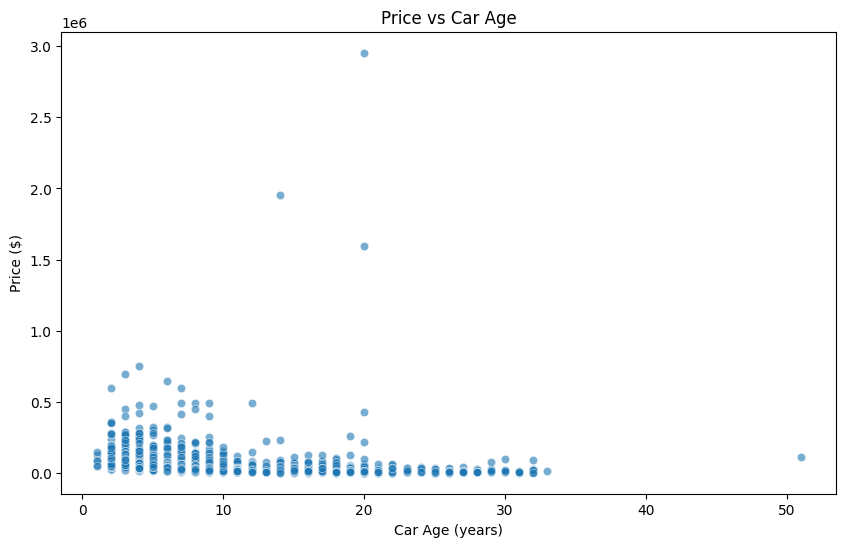

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Car_Age', y='price', data=df, alpha=0.6)
plt.title("Price vs Car Age")
plt.xlabel("Car Age (years)")
plt.ylabel("Price ($)")
plt.show()


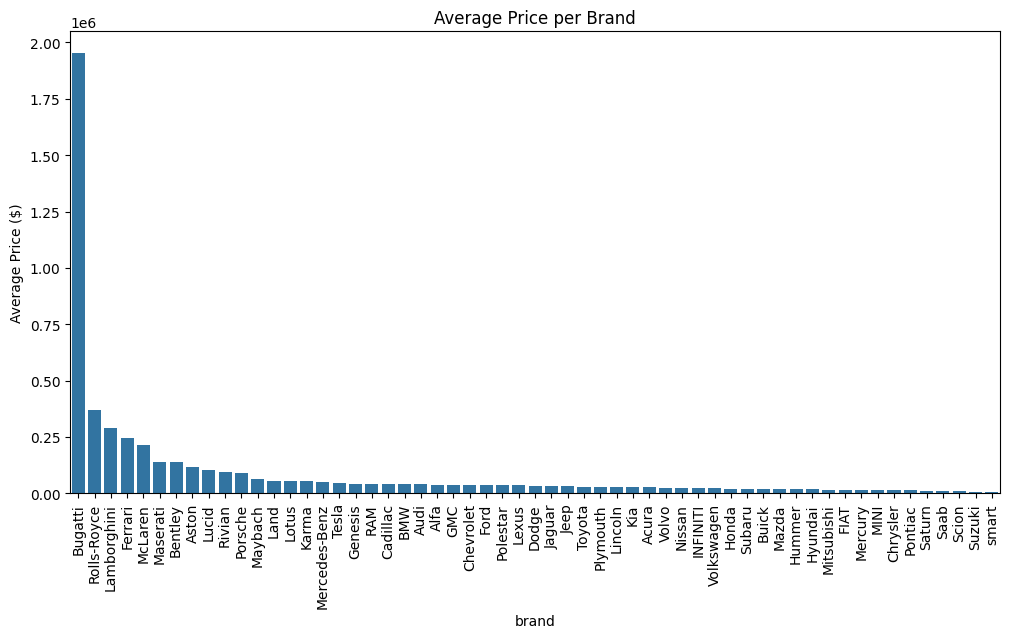

In [ ]:
avg_price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.xticks(rotation=90)
plt.title("Average Price per Brand")
plt.ylabel("Average Price ($)")
plt.show()


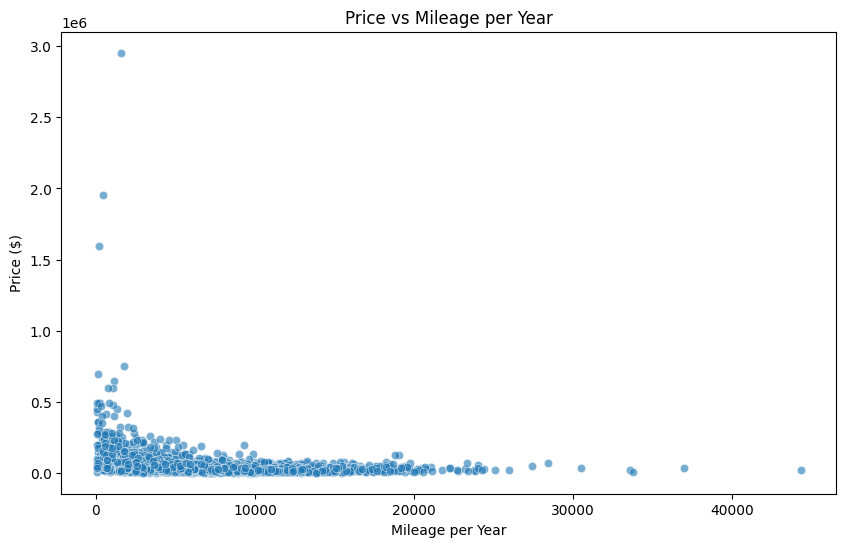

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage_per_Year', y='price', data=df, alpha=0.6)
plt.title("Price vs Mileage per Year")
plt.xlabel("Mileage per Year")
plt.ylabel("Price ($)")
plt.show()


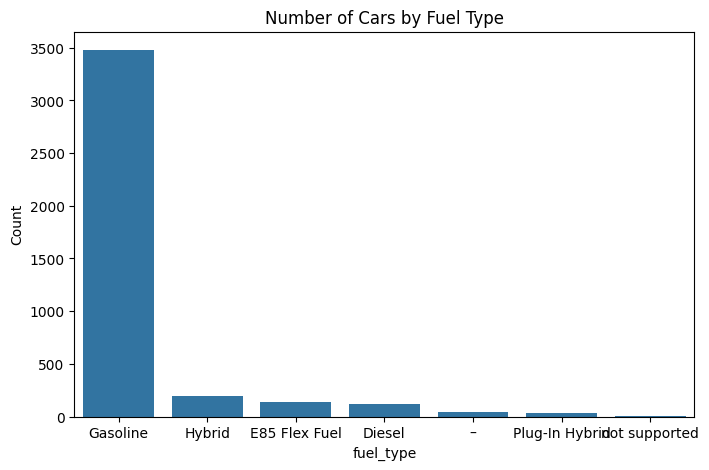

In [ ]:
fuel_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.title("Number of Cars by Fuel Type")
plt.ylabel("Count")
plt.show()


In [ ]:
brand_summary = df.groupby('brand').agg(
    Average_Price=('price', 'mean'),
    Car_Count=('price', 'count'),
    Average_Mileage=('milage', 'mean')
).reset_index()

brand_summary.to_csv("/content/brand_summary.csv", index=False)


In [ ]:
age_summary = df.groupby('Car_Age').agg(
    Average_Price=('price', 'mean'),
    Average_Mileage_per_Year=('Mileage_per_Year', 'mean')
).reset_index()

age_summary.to_csv("/content/age_summary.csv", index=False)
